<a href="https://colab.research.google.com/github/justinstayy/TradeOpenness/blob/main/IndividualTask4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance




In [ ]:
import yfinance as yf
import pandas as pd
import os

tickers = ['BOTZ', 'WTAI', 'IGPT', 'ROBO', 'AIQ']
start_date = "2023-01-01"
end_date = "2024-12-31"

os.makedirs("etf_data_full", exist_ok=True)

for ticker in tickers:

    df = yf.download(ticker, start=start_date, end=end_date, progress=False)

    if df.empty:

        continue

    # Keeping  Open, High, Low, Close only Prices.
    df = df[['Open', 'High', 'Low', 'Close']]
    df.index.name = 'Date'

    #Here we are saving the full file
    file_path = f"etf_data_full/{ticker}_FullPrices_2023_2024.csv"
    df.to_csv(file_path)
    print(f"Files are saved and stored inside google colab: {file_path}")


Files are saved and stored inside google colab: etf_data_full/BOTZ_FullPrices_2023_2024.csv
Files are saved and stored inside google colab: etf_data_full/WTAI_FullPrices_2023_2024.csv
Files are saved and stored inside google colab: etf_data_full/IGPT_FullPrices_2023_2024.csv
Files are saved and stored inside google colab: etf_data_full/ROBO_FullPrices_2023_2024.csv
Files are saved and stored inside google colab: etf_data_full/AIQ_FullPrices_2023_2024.csv


<ipython-input-4-aaec03272cb9>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-4-aaec03272cb9>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-4-aaec03272cb9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[price_type] = pd.to_numeric(df[price_type], errors='coerce')
<ipython-input-4-aaec03272cb9>:15: UserWarning: Could n

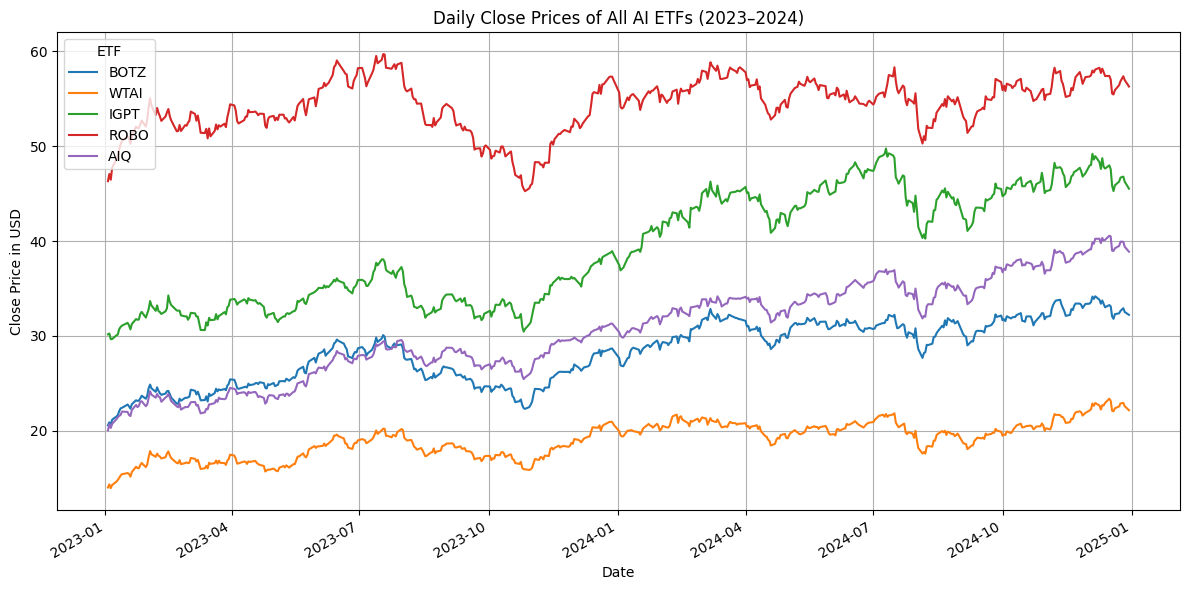

In [ ]:
# 1 exercise.
import pandas as pd
import matplotlib.pyplot as plt

tickers = ['BOTZ', 'WTAI', 'IGPT', 'ROBO', 'AIQ']
price_type = 'Close'

data = pd.DataFrame()

for ticker in tickers:
    df = pd.read_csv(f'etf_data_full/{ticker}_FullPrices_2023_2024.csv')

    df.columns = df.columns.str.strip()
    df.rename(columns={df.columns[0]: 'Date'}, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.dropna(subset=['Date'])
    df.set_index('Date', inplace=True)

    #Ensuring that our selected column is numeric
    df[price_type] = pd.to_numeric(df[price_type], errors='coerce')

    data[ticker] = df[price_type]

plt.figure(figsize=(12, 6))
data.plot(ax=plt.gca())
plt.title(f'Daily {price_type} Prices of All AI ETFs (2023–2024)')
plt.xlabel('Date')
plt.ylabel(f'{price_type} Price in USD')
plt.legend(title='ETF')
plt.grid(True)
plt.tight_layout()
plt.show()




We can observe from the plot that the AI-focused ETFs actually follow a similar upwards trends, but we must state that price levels and volatility actually vary a lot.ROBO ETF has the highest close price level across all ETFs.We can see that these AI-related portfolios experienced a noticeable decline in value during the period from August to December 2023, but later on it stabilized and they continued to follow their smooth growth trend.

<ipython-input-5-95817af1b86d>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


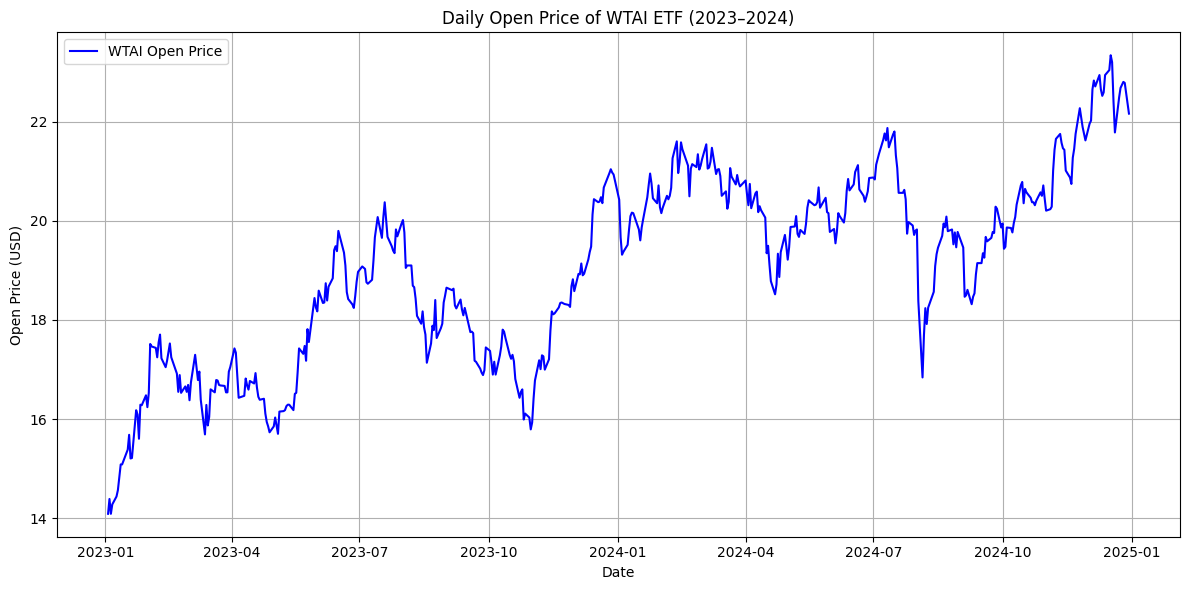

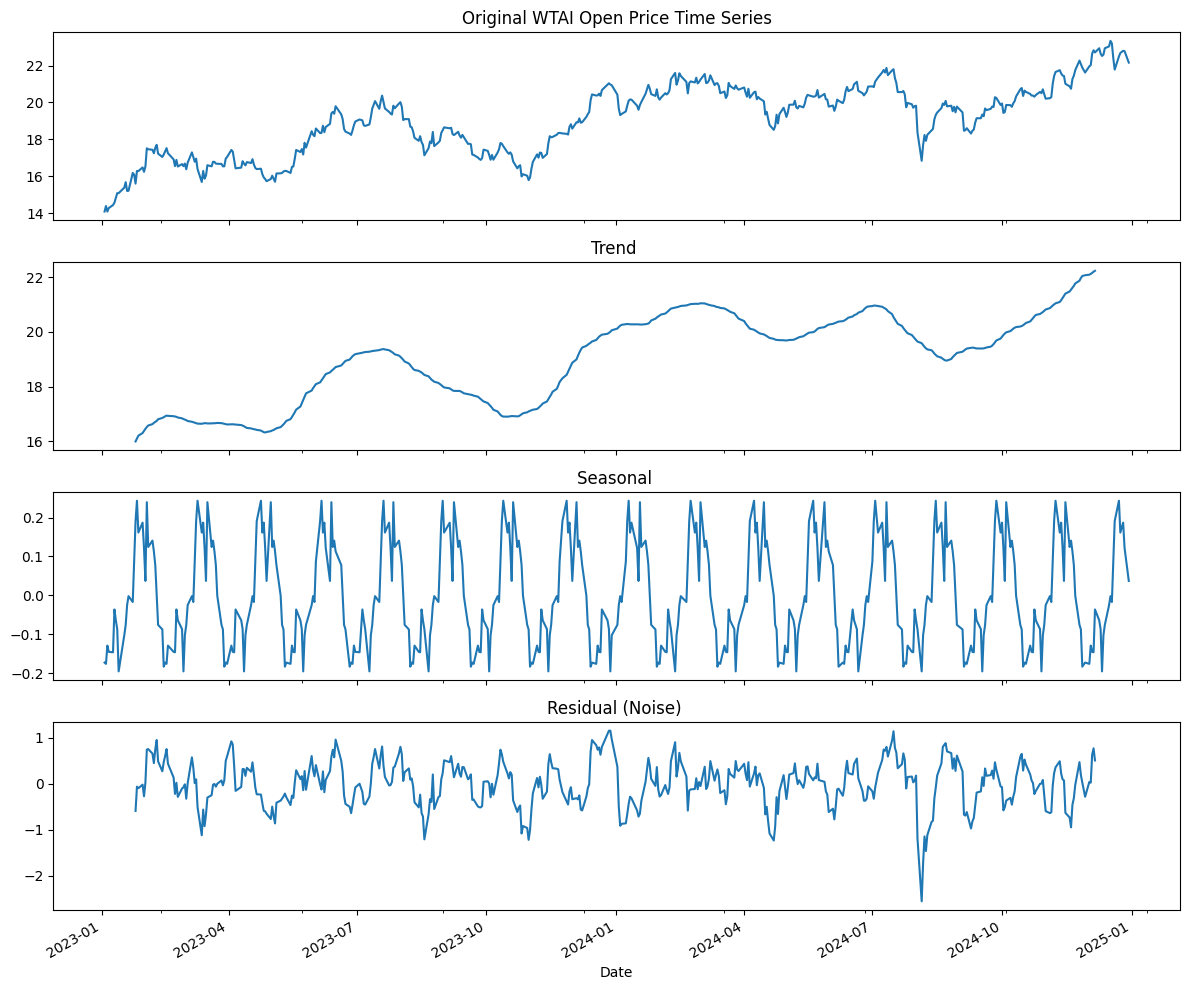

In [ ]:
# 2 exercise.
import pandas as pd
import matplotlib.pyplot as plt

#Loading our saved data
df = pd.read_csv('etf_data_full/WTAI_FullPrices_2023_2024.csv')

# Cleaning up collumn names
df.columns = df.columns.str.strip()
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df.set_index('Date', inplace=True)

#Converting open to numeric
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')

#Plotting the time sries
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Open'], label='WTAI Open Price', color='blue')
plt.title('Daily Open Price of WTAI ETF (2023–2024)')
plt.xlabel('Date')
plt.ylabel('Open Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
########################################################################
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

#Dropping nan values
ts = df['Open'].dropna()

# Decommposing
result = seasonal_decompose(ts, model='additive', period=30)

# Plotting
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

result.observed.plot(ax=axes[0], title='Original WTAI Open Price Time Series')
result.trend.plot(ax=axes[1], title='Trend ')
result.seasonal.plot(ax=axes[2], title='Seasonal ')
result.resid.plot(ax=axes[3], title='Residual (Noise) ')

plt.tight_layout()
plt.show()


Our time series is not stationary. We can clearly see that our WTAI ETF has a clear upward trend over time and shows repeating patterns regularly. From our Noise graph we can see that our variance is more spread out, it's changing constantly. Seasonal Component is expected to show us a repeating pattern since a lot of ETFs show a cyclical behavior( monthly investmens,earnings cycles and etc.)

In [ ]:
# 3 exercise.
from statsmodels.tsa.stattools import adfuller

# Again dropping missing values
wtai_open = df['Open'].dropna()

# Running the  Augmented Dickey-Fuller test
adf_result = adfuller(wtai_open)

# Displaying the results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")


ADF Statistic: -2.4186460181848397
p-value: 0.13654271607810542
Critical Values:
   1%: -3.443496379464
   5%: -2.8673378563200003
   10%: -2.569858036


We performed the Augmented Dickey-Fuller test and it can be seen that the test returns a p-value of 0.1365 which is bigger than the 0.05 significance level.Thus, we fail to reject the null hypothesis of a unit root. This test once again confirms that the WTAI Open price series is actually not stationary.

ADF Statistic: -16.801690169740567
p-value: 1.2188363190865687e-29


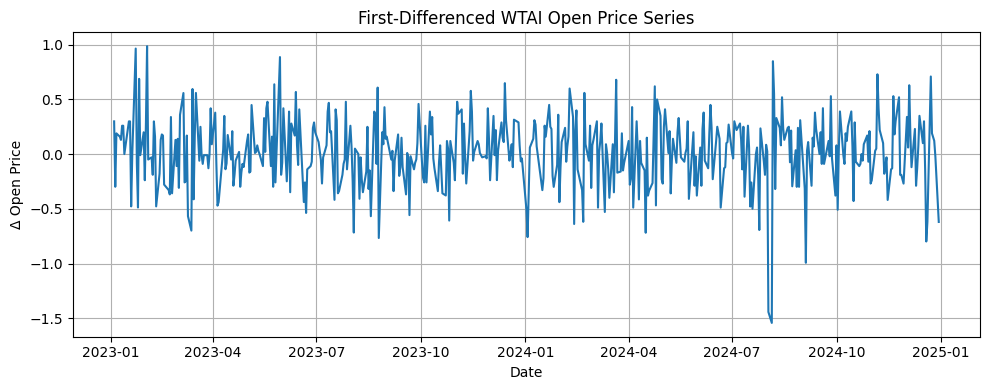

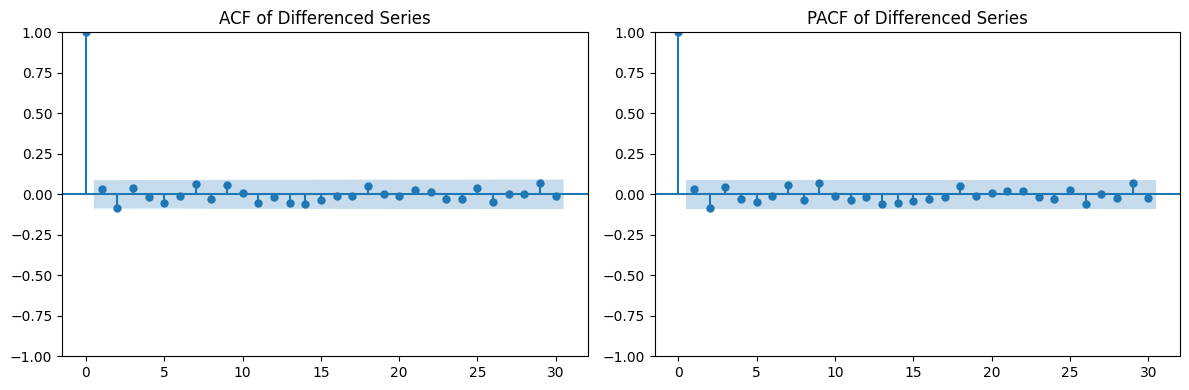

In [ ]:
# 4 exercise (stationarity transformation)
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Defining the Difference
wtai_diff = df['Open'].diff().dropna()

# ADF test on differenced series
adf_result = adfuller(wtai_diff)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

# plotting the differenced series
plt.figure(figsize=(10, 4))
plt.plot(wtai_diff)
plt.title('First-Differenced WTAI Open Price Series')
plt.xlabel('Date')
plt.ylabel('Δ Open Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(wtai_diff, lags=30, ax=axes[0])
axes[0].set_title("ACF of Differenced Series")
plot_pacf(wtai_diff, lags=30, ax=axes[1])
axes[1].set_title("PACF of Differenced Series")
plt.tight_layout()
plt.show()


To make our non-stationary series stationary we applied the differenced transformation- Y't=Yt-Yt-1. After performing the Augmented Dickey-Fuller test again we observe a p value close to 0, which confirms that we succeded transforming our series to stationary. Our Autocorrelation Function and Partial Autocorrelation function shows a significant spike at the first lag which is followed by a very sharp decline and then smoothing out. This suggests to us that our defferenced series could follow AR(1) , MA(1) or possibly behave just as white noise.

In [ ]:
# Calculating returns for all assets (5 Ai ETFs)
import pandas as pd
import numpy as np

tickers = ['BOTZ', 'WTAI', 'IGPT', 'ROBO', 'AIQ']
log_returns = pd.DataFrame()

for ticker in tickers:
    df = pd.read_csv(f'etf_data_full/{ticker}_FullPrices_2023_2024.csv')
    df.columns = df.columns.str.strip()
    df.rename(columns={df.columns[0]: 'Date'}, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.dropna(subset=['Date'])
    df.set_index('Date', inplace=True)

    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    log_returns[ticker] = np.log(df['Close'] / df['Close'].shift(1))
  #saving as a csv file in google colab notebook

log_returns.to_csv("AI_ETFs_LogReturns.csv")

log_returns.head()


<ipython-input-8-a8e35f9b6256>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-8-a8e35f9b6256>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-8-a8e35f9b6256>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-8-a8e35f9b6256>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is 

BOTZ      WTAI      IGPT      ROBO       AIQ
Date                                                        
2023-01-03       NaN       NaN       NaN       NaN       NaN
2023-01-04  0.014901  0.022757  0.002869  0.016188  0.031811
2023-01-05 -0.014901 -0.027885 -0.020257 -0.012972 -0.019456
2023-01-06  0.028171  0.023710  0.000899  0.026820  0.020900
2023-01-09  0.015417  0.023706  0.012614  0.017966  0.023296

Decided to use the Log retusn , which show us the Continious Growth rate.

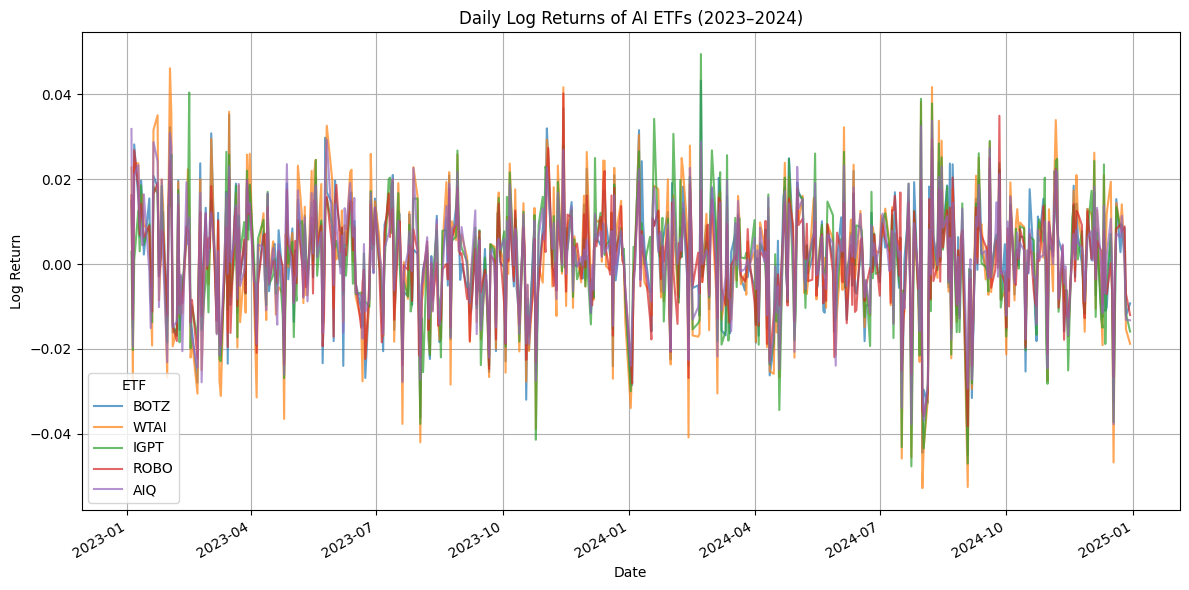

          mean       std       min       max  Sharpe (mean/std)
BOTZ  0.000897  0.013467 -0.045042  0.043182           0.066574
WTAI  0.000916  0.016034 -0.052792  0.046107           0.057144
IGPT  0.000823  0.013921 -0.047670  0.049457           0.059139
ROBO  0.000390  0.011602 -0.038219  0.040187           0.033641
AIQ   0.001325  0.012318 -0.037740  0.033766           0.107560


In [ ]:
# 4 exercise. Ploting return series...
import pandas as pd
import matplotlib.pyplot as plt

# Load log returns
returns = pd.read_csv("AI_ETFs_LogReturns.csv", index_col=0, parse_dates=True)

# Ploting all return series
plt.figure(figsize=(12, 6))
returns.plot(ax=plt.gca(), alpha=0.7)
plt.title("Daily Log Returns of AI ETFs (2023–2024)")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)
plt.legend(title="ETF")
plt.tight_layout()
plt.show()

# Summary statistics
summary_stats = returns.describe().T[['mean', 'std', 'min', 'max']]
summary_stats['Sharpe (mean/std)'] = summary_stats['mean'] / summary_stats['std']
summary_stats = summary_stats.round(6)

print(summary_stats)


We decided to calculate the daily log returns for all of the AI ETFs using the closing prices over the period 2023-2024. AIQ shows the highest average log return of (0.001235) and the highest sharpe ratio of 0.107560. While other ETFs like BOTZ also perform very similarly AIQ basically offers us the best sharpe ratio return and a lower volatility, making it the Ai ETF I whould choose to invest in.

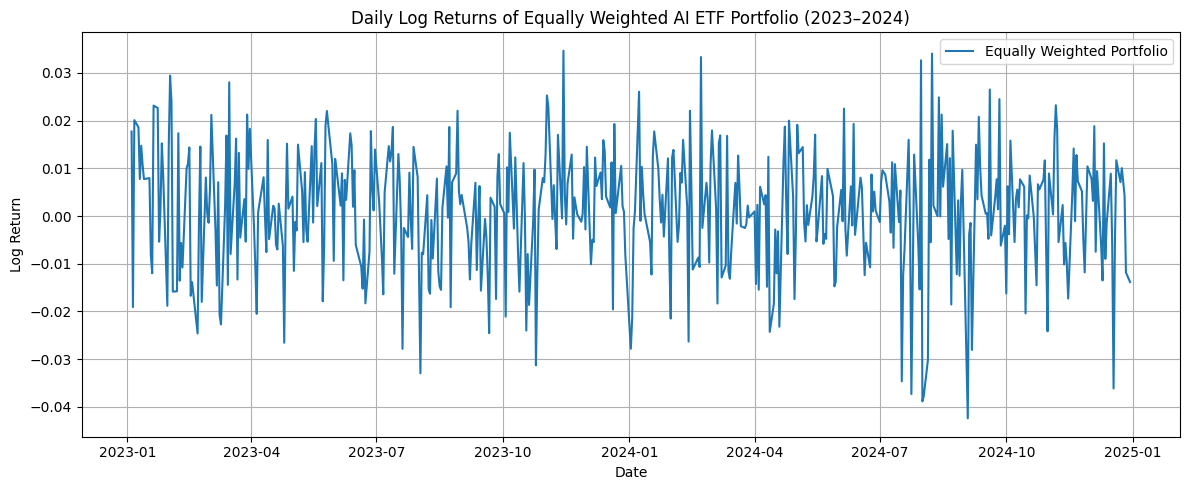

Mean Return     0.000870
Volatility      0.012784
Min Return     -0.042415
Max Return      0.034648
Sharpe ratio    0.068071
dtype: float64


In [ ]:
# 5 exercise
import pandas as pd
import matplotlib.pyplot as plt

#Loading already calculated log returns
log_returns = pd.read_csv("AI_ETFs_LogReturns.csv", index_col=0, parse_dates=True)

#  Equal weights for each ETF
weights = [1/5] * len(log_returns.columns)

#  Daily portfolio log return (weighted sum across ETFs)
portfolio_returns = log_returns.dot(weights)

# Ploting portfolio return series
plt.figure(figsize=(12, 5))
plt.plot(portfolio_returns, label='Equally Weighted Portfolio')
plt.title("Daily Log Returns of Equally Weighted AI ETF Portfolio (2023–2024)")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#  Portfolio stats
portfolio_stats = {
    'Mean Return': portfolio_returns.mean(),
    'Volatility ': portfolio_returns.std(),
    'Min Return': portfolio_returns.min(),
    'Max Return': portfolio_returns.max(),
    'Sharpe ratio': portfolio_returns.mean() / portfolio_returns.std()
}


portfolio_stats = pd.Series(portfolio_stats).round(6)
print(portfolio_stats)


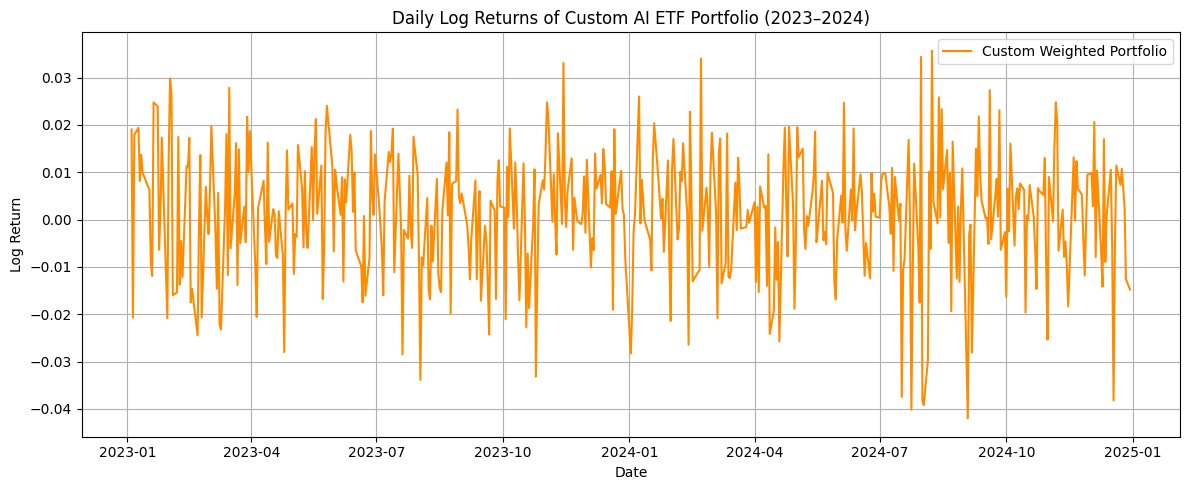

Mean Return          0.000961
Volatility (Std)     0.013071
Min Return          -0.041993
Max Return           0.035693
Sharpe (mean/std)    0.073523
dtype: float64


In [ ]:
# 6 exercise My custom portfolio
# Custom weights: AIQ, ROBO, WTAI, IGPT, BOTZ
custom_weights = [0.10, 0.25, 0.25, 0.10, 0.30]  # BOTZ, WTAI, IGPT, ROBO, AIQ
log_returns = log_returns[['BOTZ', 'WTAI', 'IGPT', 'ROBO', 'AIQ']]  # Ensuring order matches the weights

# Confirming they sum to 1
assert sum(custom_weights) == 1.0, "Weights must sum to 1.0"

# Portfolio return calculation
custom_portfolio_returns = log_returns.dot(custom_weights)

# Ploting custom portfolio returns
plt.figure(figsize=(12, 5))
plt.plot(custom_portfolio_returns, label='Custom Weighted Portfolio', color='darkorange')
plt.title("Daily Log Returns of Custom AI ETF Portfolio (2023–2024)")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Portfolio stats
custom_portfolio_stats = {
    'Mean Return': custom_portfolio_returns.mean(),
    'Volatility (Std)': custom_portfolio_returns.std(),
    'Min Return': custom_portfolio_returns.min(),
    'Max Return': custom_portfolio_returns.max(),
    'Sharpe (mean/std)': custom_portfolio_returns.mean() / custom_portfolio_returns.std()
}

custom_portfolio_stats = pd.Series(custom_portfolio_stats).round(6)
print(custom_portfolio_stats)


In [ ]:
# 7 exercise.
# Create equal weights
equal_weights = [1/5] * 5
log_returns_eq = log_returns.copy()

# Grouping by year
rebalanced_eq = log_returns_eq.groupby(log_returns_eq.index.year).apply(
    lambda df: df.dot(equal_weights)
).droplevel(0)

# Stats
stats_eq_rebalanced = {
    'Mean Return': rebalanced_eq.mean(),
    'Volatility (Std)': rebalanced_eq.std(),
    'Min Return': rebalanced_eq.min(),
    'Max Return': rebalanced_eq.max(),
    'Sharpe (mean/std)': rebalanced_eq.mean() / rebalanced_eq.std()
}
print("Equal-Weighted Portfolio, Yearly Rebalanced")
print(pd.Series(stats_eq_rebalanced).round(6))




Equal-Weighted Portfolio, Yearly Rebalanced
Mean Return          0.000870
Volatility (Std)     0.012784
Min Return          -0.042415
Max Return           0.034648
Sharpe (mean/std)    0.068071
dtype: float64


In [ ]:
custom_weights = [0.10, 0.25, 0.10, 0.25, 0.30]  # BOTZ, WTAI, IGPT, ROBO, AIQ
log_returns_custom = log_returns[['BOTZ', 'WTAI', 'IGPT', 'ROBO', 'AIQ']].copy()

rebalanced_custom = log_returns_custom.groupby(log_returns_custom.index.year).apply(
    lambda df: df.dot(custom_weights)
).droplevel(0)

# Stats
stats_custom_rebalanced = {
    'Mean Return': rebalanced_custom.mean(),
    'Volatility (Std)': rebalanced_custom.std(),
    'Min Return': rebalanced_custom.min(),
    'Max Return': rebalanced_custom.max(),
    'Sharpe (mean/std)': rebalanced_custom.mean() / rebalanced_custom.std()
}
print(" Custom Portfolio - Yearly Rebalanced")
print(pd.Series(stats_custom_rebalanced).round(6))


 Custom Portfolio - Yearly Rebalanced
Mean Return          0.000896
Volatility (Std)     0.012728
Min Return          -0.040674
Max Return           0.034976
Sharpe (mean/std)    0.070402
dtype: float64


We can see that our equally weighted portfolio after rebalancing had basically little to no effect at all. This could happen because the ETF performances were similar. After applying yearly rebalancing to our custom portfolio, both the mean return and std slightly decreased. However, we must state that our custom portfolio remained consistent. After applying yearly rebalancing, which ensures we don't gather too much risk, our portfolio remained consistent.

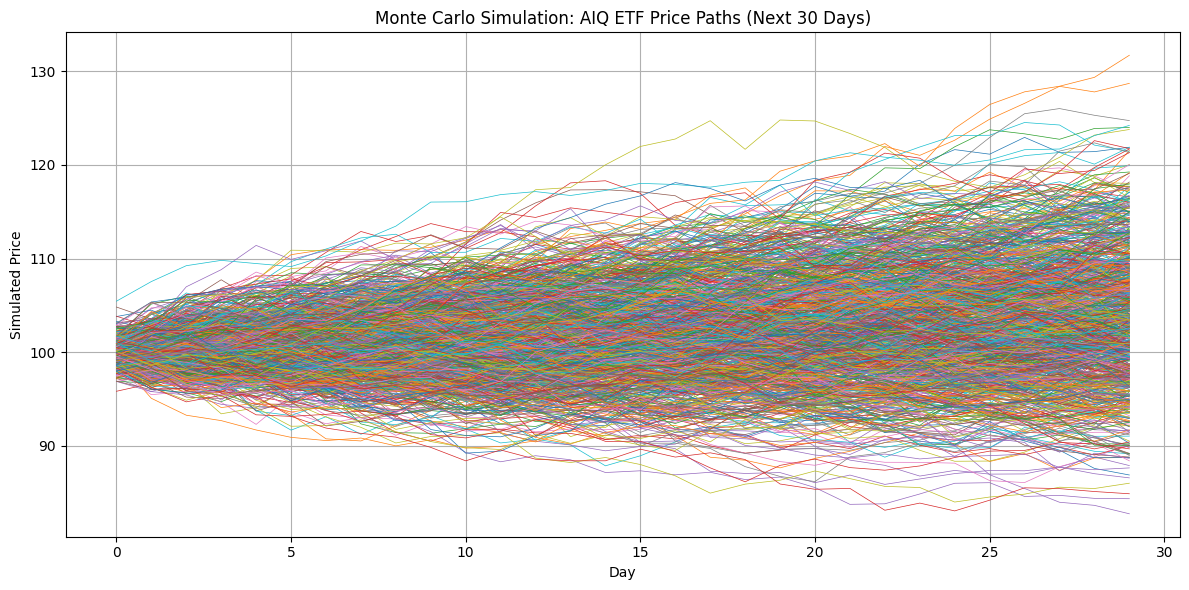

In [ ]:
# 8 exercise.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading returns
log_returns = pd.read_csv('/content/AI_ETFs_LogReturns.csv', index_col=0, parse_dates=True)
aiq_returns = log_returns['AIQ'].dropna()

# Parameters
mu = aiq_returns.mean()
sigma = aiq_returns.std()
num_days = 30
num_simulations = 1000
start_price = 100

# Simulating paths
simulated_paths = np.zeros((num_days, num_simulations))
for i in range(num_simulations):
    shocks = np.random.normal(mu, sigma, num_days)
    simulated_paths[:, i] = start_price * np.exp(np.cumsum(shocks))


plt.figure(figsize=(12, 6))
for i in range(num_simulations):
    plt.plot(simulated_paths[:, i], linewidth=0.5)

plt.title("Monte Carlo Simulation: AIQ ETF Price Paths (Next 30 Days)")
plt.xlabel("Day")
plt.ylabel("Simulated Price")
plt.grid(True)
plt.tight_layout()
plt.show()


Assumptions
1. Log returns are normally distributed
2. Returns are IID
3. Parameters were actually estimated from the AIQs historical data 2023-2024
4. Simulated for 30 days
5. Set the initial price at 100 for easier understanding

Our Monte Carlo simulation shows 1000 possible price paths for the AIQ ETF for the next 30 days.
We can state that most paths stay around between 95 - 115. A few paths actually rise above 130 or even drop to 85 which shows us that there coud be some extreme outcomes. AS time increases so does the spread of our possible future prices.

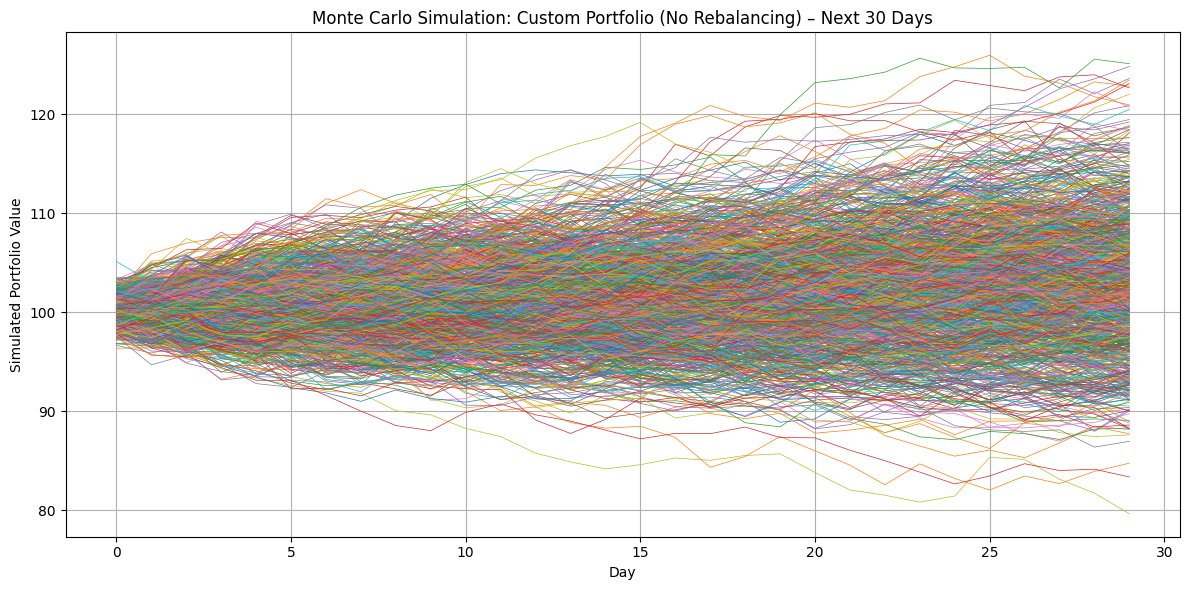

In [ ]:
#exercise 9
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading CSV from colab
log_returns = pd.read_csv('/content/AI_ETFs_LogReturns.csv', index_col=0, parse_dates=True)

#Our custom weights
custom_weights = np.array([0.10, 0.25, 0.10, 0.25, 0.30])

# Calculating daily portfolio returns without rebalancing
portfolio_returns = log_returns[['BOTZ', 'WTAI', 'IGPT', 'ROBO', 'AIQ']].dropna().dot(custom_weights)


mu = portfolio_returns.mean()
sigma = portfolio_returns.std()

# Monte Carlo parameters
num_days = 30
num_simulations = 1000
start_price = 100


simulated_paths = np.zeros((num_days, num_simulations))
for i in range(num_simulations):
    random_returns = np.random.normal(mu, sigma, num_days)
    simulated_paths[:, i] = start_price * np.exp(np.cumsum(random_returns))

# Plot
plt.figure(figsize=(12, 6))
for i in range(num_simulations):
    plt.plot(simulated_paths[:, i], linewidth=0.5)

plt.title("Monte Carlo Simulation: Custom Portfolio (No Rebalancing) – Next 30 Days")
plt.xlabel("Day")
plt.ylabel("Simulated Portfolio Value")
plt.grid(True)
plt.tight_layout()
plt.show()


Assumptions
1. Log returns are normally distributed
2. Returns are IID
3. The portfolios daily mean return and standart deviation are calculated from the historical data.
4. A portfolio used without any yearly rebalancing( Our custom portfolio)
5. starting price value is set again at 100 for simplisity reasons.

This Monte Carlo simulation shows again 1000 potential paths for our custom portfolio without any yearly rebalancing. Most paths remain in the 95–110 range. A few simulations show extreme outcomes below 90 or above 120. As we expected, the spread widens over time, and since our custom portfolio without yearly balancing "takes in" more risk, we observe more extreme outcomes due to uncertainty.

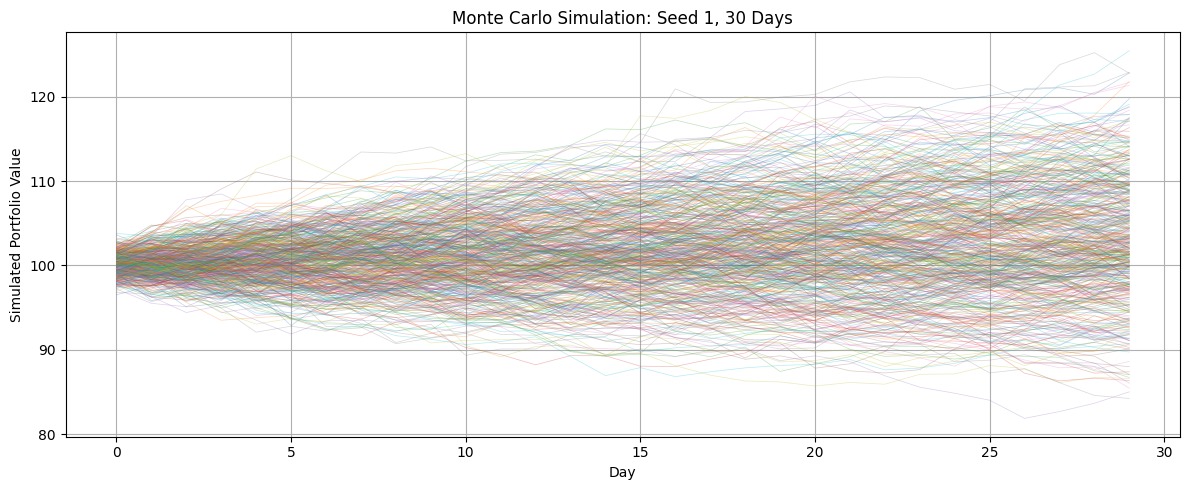

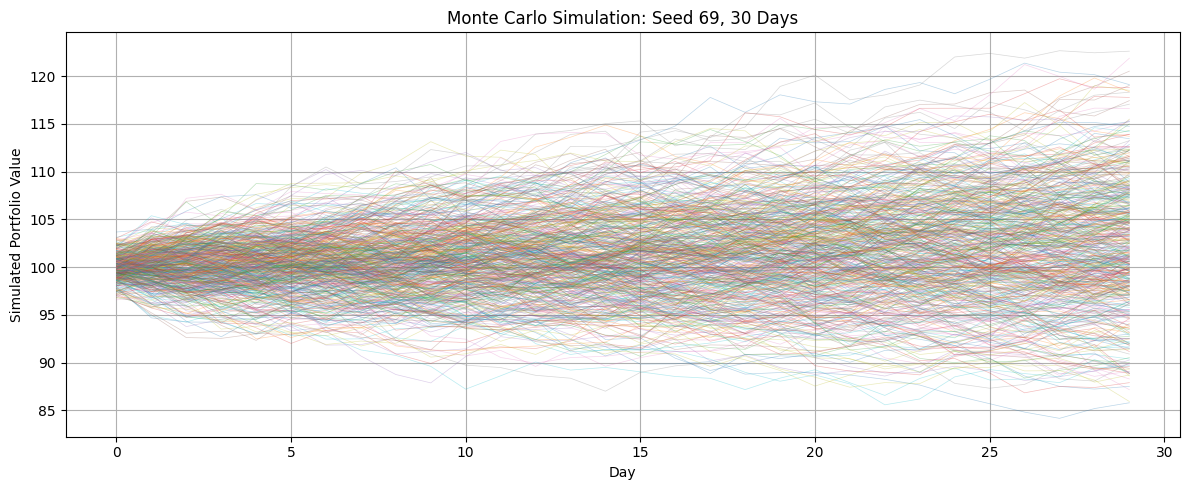

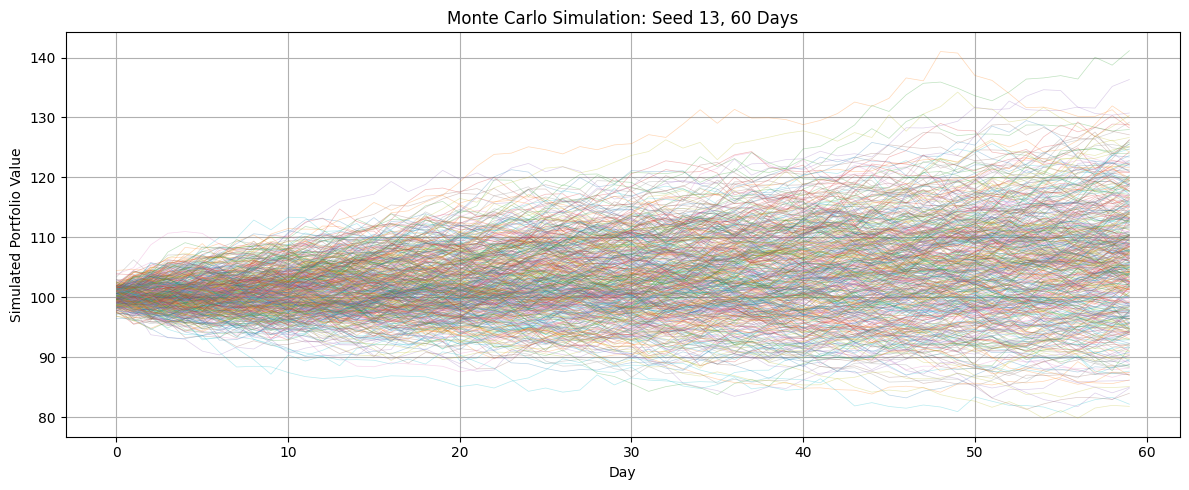

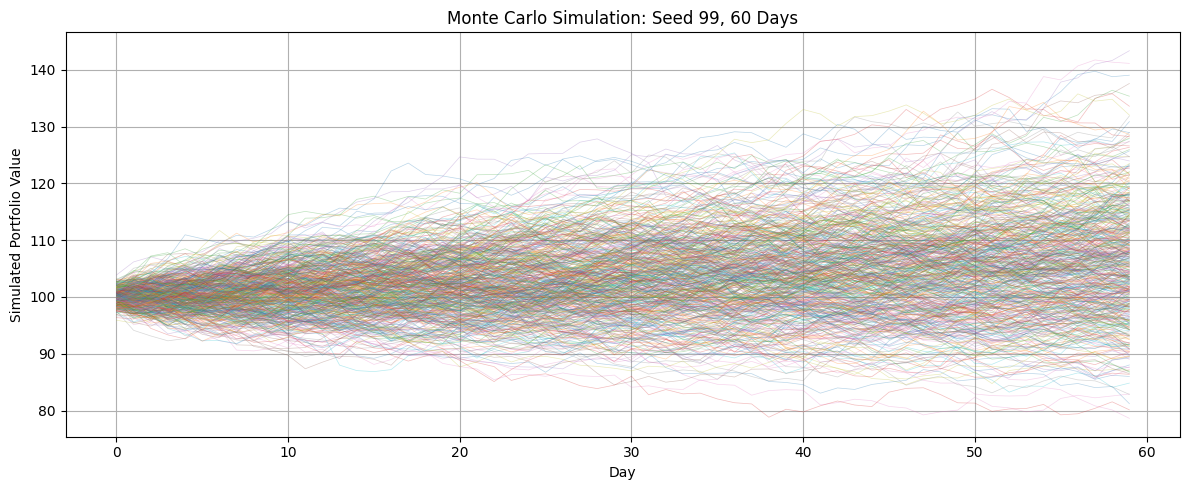

In [ ]:
# 10 exercise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


log_returns = pd.read_csv('/content/AI_ETFs_LogReturns.csv', index_col=0, parse_dates=True)

#Using custom weights again
custom_weights = np.array([0.10, 0.25, 0.10, 0.25, 0.30])  # BOTZ, WTAI, IGPT, ROBO, AIQ
portfolio_returns = log_returns[['BOTZ', 'WTAI', 'IGPT', 'ROBO', 'AIQ']].dropna().dot(custom_weights)


mu = portfolio_returns.mean()
sigma = portfolio_returns.std()

# Monte Carlo simulation function
def monte_carlo_simulation(seed, num_days, mu, sigma, start_price=100, num_simulations=500):
    np.random.seed(seed)
    paths = np.zeros((num_days, num_simulations))
    for i in range(num_simulations):
        rand_returns = np.random.normal(mu, sigma, num_days)
        paths[:, i] = start_price * np.exp(np.cumsum(rand_returns))
    return paths

# Defining random seeds
simulations = {
    'Seed 1, 30 Days': monte_carlo_simulation(1, 30, mu, sigma),
    'Seed 69, 30 Days': monte_carlo_simulation(69, 30, mu, sigma),
    'Seed 13, 60 Days': monte_carlo_simulation(13, 60, mu, sigma),
    'Seed 99, 60 Days': monte_carlo_simulation(99, 60, mu, sigma)
}

# Ploting
for title, sim_data in simulations.items():
    plt.figure(figsize=(12, 5))
    for i in range(sim_data.shape[1]):
        plt.plot(sim_data[:, i], alpha=0.3, linewidth=0.5)
    plt.title(f"Monte Carlo Simulation: {title}")
    plt.xlabel("Day")
    plt.ylabel("Simulated Portfolio Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


When we changed the random seed for the 30-day simulation, we observed slightly different simulated price paths, but we can state that the overall spread remained stable. When we extended our simulation to 60 days, we observed a very noticeable widening of the price distribution, since a longer forecasting period leads to greater uncertainty. We observed more extreme outcomes because we prolonged the period to 60 days.